In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras import layers





In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
Xtr_scale, Xts_scale = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
ytr = to_categorical(train_labels, 10)
yts = to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
Xtr_scale.shape

(50000, 32, 32, 3)

In [ ]:
keras.backend.clear_session()

In [ ]:
def design_model(num_hidden, input_dim, num_output):
    model = Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(num_hidden,

                    activation = 'sigmoid',
                    name = 'hidden'))
    model.add(Dense(10,
                    activation = 'softmax',
                    name = 'output'))
    return model

In [ ]:
model = design_model(256, Xtr_scale.shape[1], np.unique(yts).size)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 hidden (Dense)              (None, 256)               786688    
                                                                 
 output (Dense)              (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs = {}):
        self.loss = []
        self.acc = []
        self.val_acc = []

    def on_batch_end(self, batch, logs = {}):
        self.loss.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs):
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

history_cb = LossHistory()

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
nepoch = 5

batch_size = 32
model.fit(Xtr_scale,
          ytr,
          epochs = nepoch,
          batch_size = batch_size,
          validation_data = (Xts_scale, yts),
          callbacks = [history_cb],
        )

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7009 - accuracy: 0.3923 - val_loss: 1.6796 - val_accuracy: 0.4061
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6613 - accuracy: 0.4069 - val_loss: 1.7169 - val_accuracy: 0.3858
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6339 - accuracy: 0.4185 - val_loss: 1.6619 - val_accuracy: 0.4067
Epoch 4/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6190 - accuracy: 0.4218 - val_loss: 1.6213 - val_accuracy: 0.4201
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5974 - accuracy: 0.4295 - val_loss: 1.6247 - val_accuracy: 0.4216


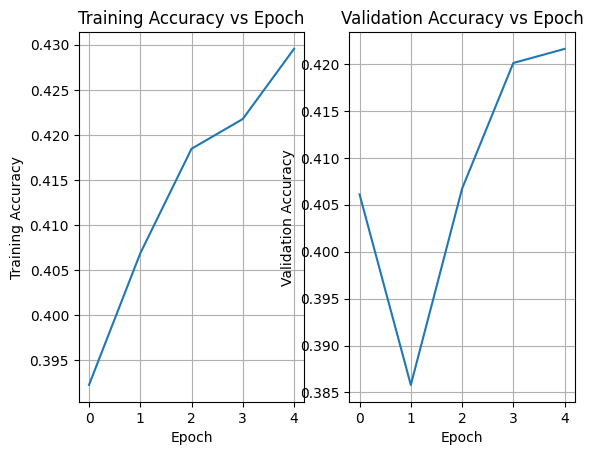

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(range(nepoch), history_cb.acc)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Epoch')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(range(nepoch), history_cb.val_acc)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epoch')
plt.grid()
plt.show()

In [ ]:
rates = [0.01, 0.001, 0.0001]
loss_hist = []
val_acc_hist = []
history = LossHistory()
for rate in rates:
    keras.backend.clear_session()
    model = design_model(256, Xtr_scale.shape[1], np.unique(yts).size)
    model.compile(optimizer = Adam(learning_rate=rate),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    model.fit(Xtr_scale,
              ytr,
              epochs = 10,
              batch_size = 100,
              validation_data = (Xts_scale, yts),
              callbacks = [history],
              verbose = 0)
    loss_hist.append(history.loss)
    val_acc_hist.append(history.val_acc)

In [ ]:
steps = [i * batch_size / Xtr_scale.shape[0] for i in range(len(loss_hist[0]))]

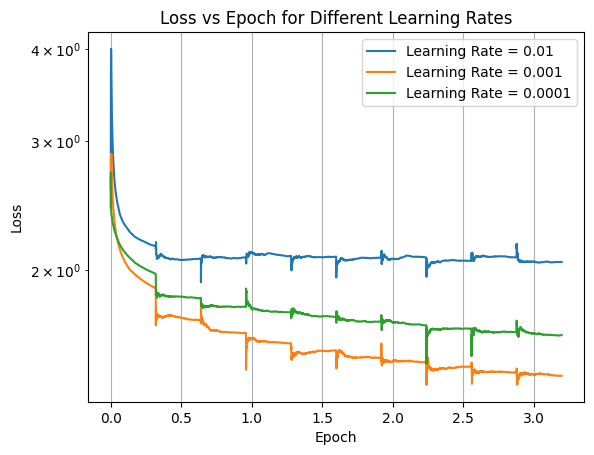

In [ ]:

for i in range(len(rates)):
    plt.semilogy(steps, loss_hist[i], label='Learning Rate = ' + str(rates[i]))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for Different Learning Rates')
plt.grid()
plt.legend()
plt.show()